# **Wine Quality Clustering Project**

[GitHub Repo](https://github.com/BlueNosedReindeer/Wine-Quality-Clustering/tree/main)

Welcome! In this notebook, we perform unsupervised clustering on the Wine Quality dataset using chemical features. We'll apply KMeans clustering and visualize the groups using PCA.

Goal: Cluster wines based on their chemical properties using unsupervised learning to discover hidden structures without relying on labels.

The dataset includes features such as acidity, sugar content, pH, sulfur dioxide levels, alcohol percentage, and more.

## **Import Libraries/Dataset**

Here, we import the libraries needed for data manipulation, visualization, clustering, and dimensionality reduction. We also import the data set.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load the dataset properly
file_path = '/kaggle/input/red-wine-quality-cortez-et-al-2009/winequality-red.csv'
red_wine = pd.read_csv(file_path)

# Check for missing values
print(red_wine.isnull().sum())

# Clean column names (remove any leading/trailing spaces)
red_wine.columns = red_wine.columns.str.strip()

# Force all columns to numeric (fixes the object dtype issue)
for col in red_wine.columns:
    red_wine[col] = pd.to_numeric(red_wine[col], errors='coerce')

# Drop rows with NaN values (safe practice)
red_wine = red_wine.dropna()

# Display first few rows
red_wine.head()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## **Exploratory Data Analysis (EDA)**

We generate dataset shape (rows × columns), column names, data types, and basic descriptive statistics (mean, median, std deviation, min, max).

This statistical snapshot helps spot potential scaling issues, outliers, or skewness in the features.


In [2]:
# Basic information
print("Dataset shape:", red_wine.shape)
print("Dataset columns:", red_wine.columns)

# Basic statistics
red_wine.describe()


Dataset shape: (1599, 12)
Dataset columns: Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


**Wine Quality Dataset Summary:**

The dataset consists of 1,599 red wine samples, each described by 12 attributes:

- 11 numerical chemical properties, including:

    - fixed acidity, volatile acidity, citric acid

    - residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide

    - density, pH, sulphates, and alcohol

- 1 quality score (quality), an integer between 3 and 8, which represents human-rated wine quality on a scale from low to high.


**Key Observations from .describe():**

- Most features have a wide range (e.g., alcohol: 8.4% to 14.9%, total sulfur dioxide: 6 to 289).

- Some features are skewed (e.g., residual sugar, total sulfur dioxide).

- The quality values are not uniformly distributed — most wines fall between 5 and 6, suggesting a concentration of average-rated wines.


## **Feature Correlation**

First we take a peak at the distributions of each feature to find anything that may lead to future issues. Then we compute and plot the correlation heatmap between features. This reveals:

- Which features are positively or negatively correlated
- Redundant features that might affect clustering

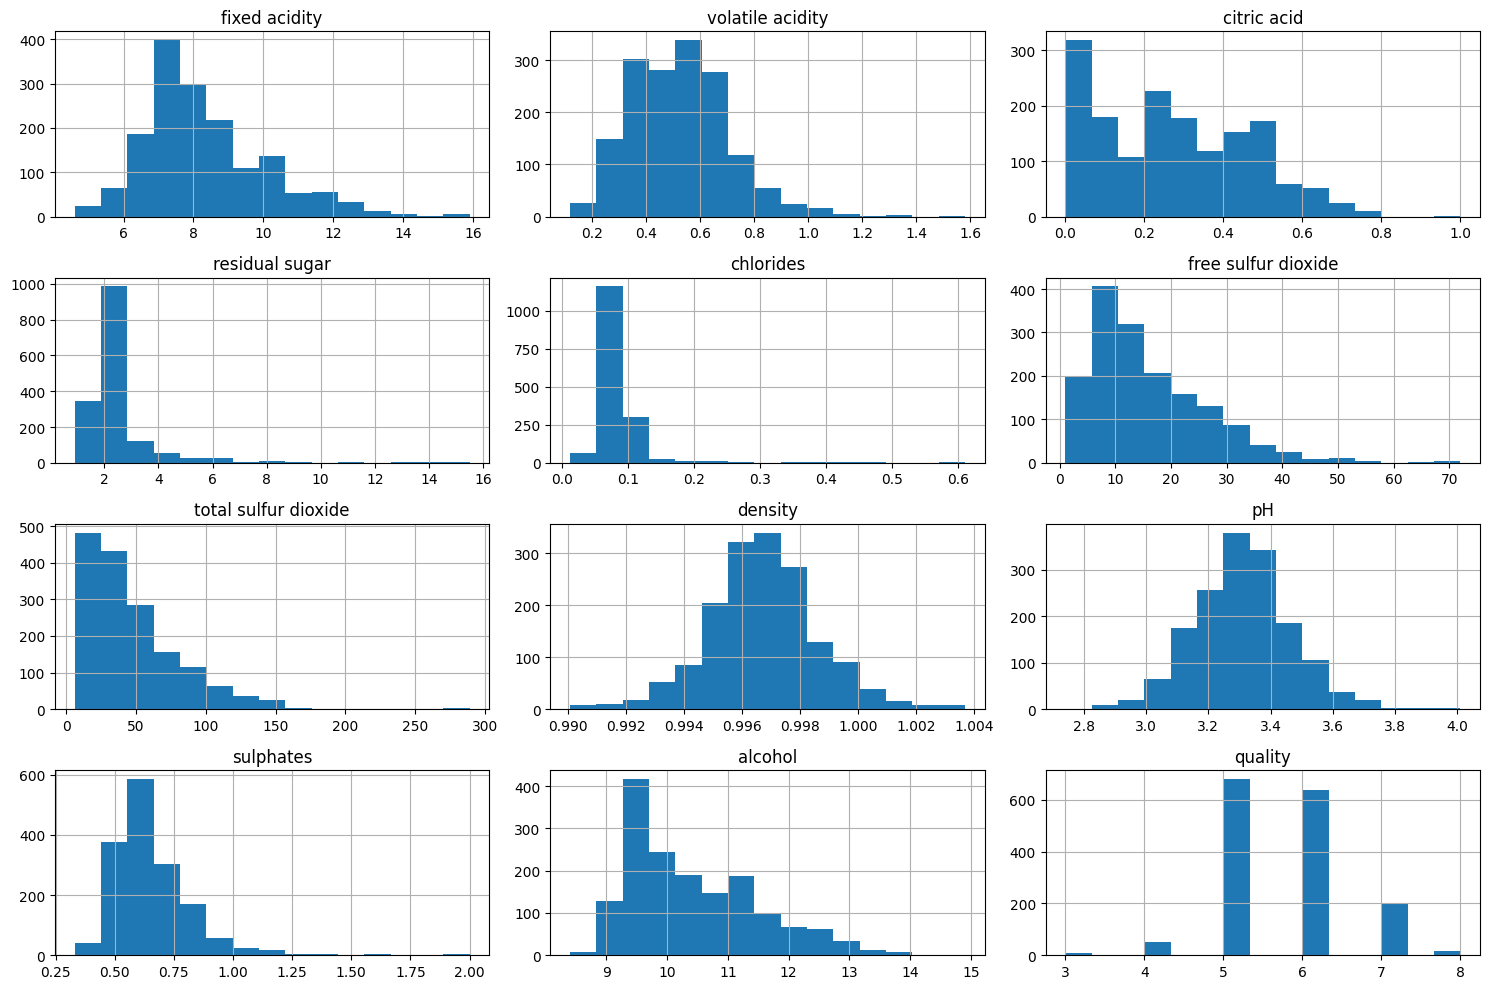

In [3]:
# Visualize feature distributions
red_wine.hist(bins=15, figsize=(15,10))
plt.tight_layout()
plt.show()


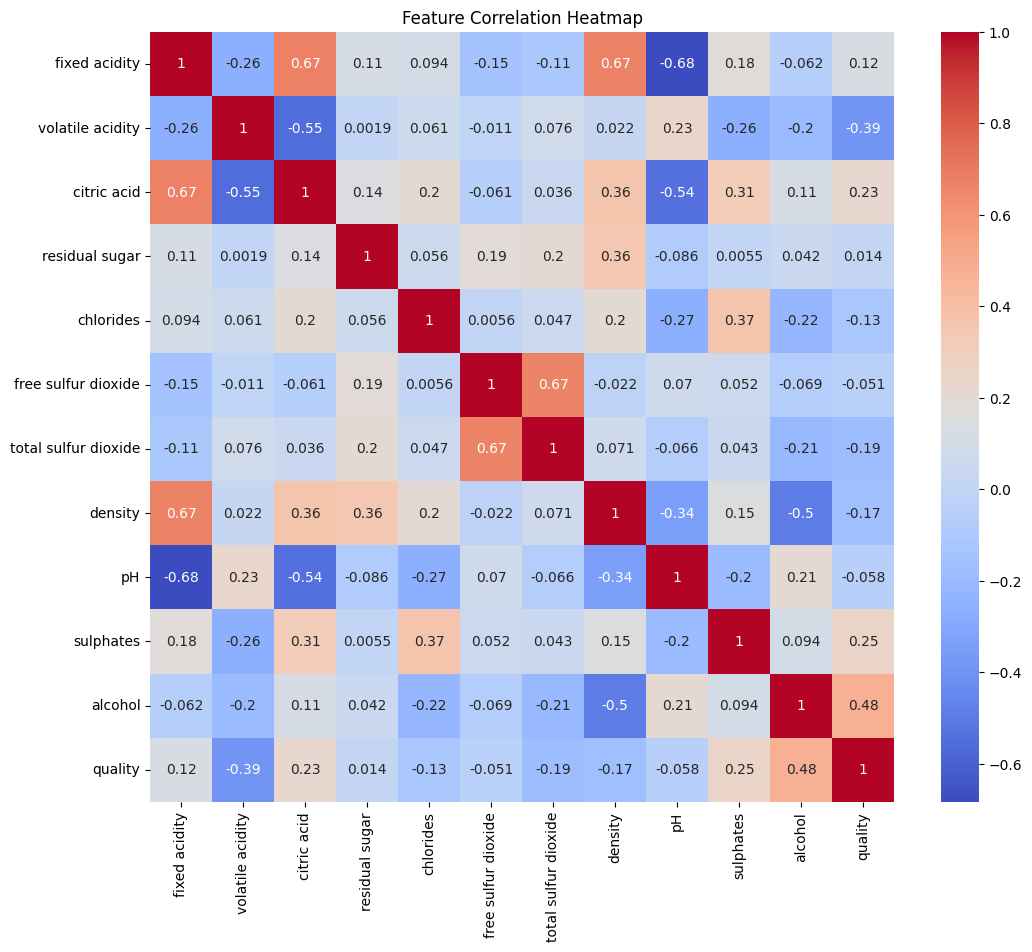

In [4]:
# Correlation heatmap
plt.figure(figsize=(12,10))
sns.heatmap(red_wine.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()


## **Determine Optimal Number of Clusters**

Using the **Elbow Method**, we find the best number of clusters by plotting the inertia values.

In preparation for clustering:

- Drop the quality label — we are doing unsupervised learning!

- Standardize features using StandardScaler to ensure all features contribute equally. Scaling is necessary because clustering is distance-based, and raw features have different units/magnitudes.

In [5]:
# Drop 'quality' to simulate unsupervised learning
X = red_wine.drop('quality', axis=1)

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


## **Analyze Cluster Properties**

Using the Elbow Method, we run KMeans for different cluster counts (k = 1 to 10), plot inertia (within-cluster sum of squares) against k, and then identify the "elbow point" where adding more clusters doesn't improve much.

Picking a good k value ensures meaningful cluster separation without overfitting.

/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:8

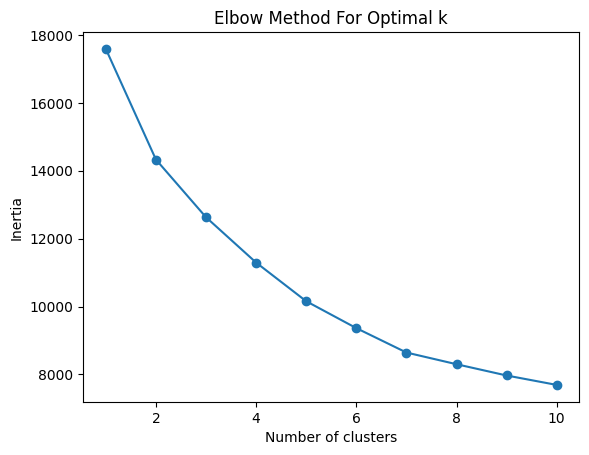

In [6]:
# Find optimal number of clusters using Elbow Method
inertia = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()


## **Conclusions**

After selecting the optimal number of clusters, we apply KMeans clustering to group wines based on their chemical features and assign cluster labels. We use Principal Component Analysis (PCA) to reduce the feature space and visualize how wines are grouped in two dimensions. By examining average feature values within each cluster, we identify the key characteristics that define the different groups, revealing natural divisions among the wines without using quality labels.

In [7]:
# Choose k=4 for example
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

# Add cluster labels to dataset
red_wine['cluster'] = kmeans_labels


/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


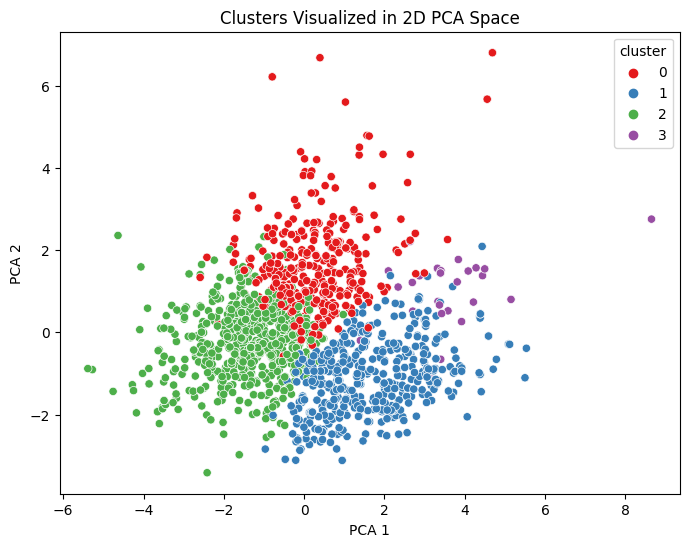

In [8]:
# Reduce dimensions for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=red_wine['cluster'], palette='Set1')
plt.title('Clusters Visualized in 2D PCA Space')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()


## **Discussion**

The clustering results reveal that wines can be grouped into distinct categories based purely on their chemical properties. The PCA visualization shows clear separation between most clusters, suggesting strong underlying patterns in the data without relying on quality labels.

Clusters 0, 1, and 2 form dense, distinguishable groups, while Cluster 3 appears smaller and more dispersed, possibly representing more unique wines. These findings highlight how chemical composition alone can differentiate wines and could offer valuable insights for producers aiming to better understand and classify their products.